<a href="https://colab.research.google.com/github/filippotessaro/NNProject/blob/master/deep_random_forest_job_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [0]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from sklearn.metrics import confusion_matrix

import os

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir dataset
!cp "gdrive/My Drive/datasets/RawData.zip" dataset/

mkdir: cannot create directory ‘dataset’: File exists


In [0]:
!unzip dataset/RawData.zip
mylist= os.listdir('RawData/')

In [0]:
type(mylist)

list

In [0]:
print(mylist[800])

03-01-05-01-02-01-09.wav


In [0]:
print(len(mylist))

1196


## Plotting the audio file's waveform and its spectrogram

In [0]:
data, sampling_rate = librosa.load('RawData/f11 (01).wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


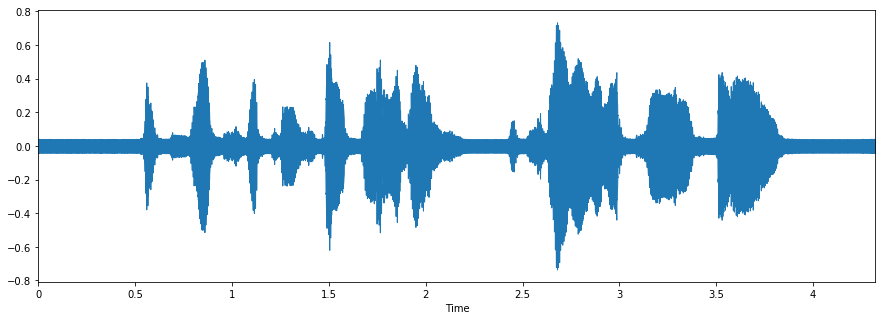

In [0]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

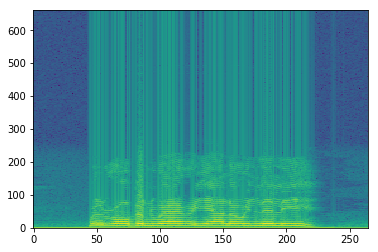

In [0]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('RawData/f10 (01).wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

## Setting the labels

In [0]:
import os
import pandas as pd
import librosa
import glob 
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')                          #female_calm
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')                        #male_calm
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')                         #female_happy
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')                           #male_happy
    elif item[6:-16]=='04' and int(item[18:-4])%2==0: 
        feeling_list.append('female_sad')                           #female_sad
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')                             #male_sad
    elif item[6:-16]=='05' and int(item[18:-4])%2==0: 
        feeling_list.append('female_angry')                         #female_angry
    elif item[6:-16]=='05' and int(item[18:-4])%2==1: 
        feeling_list.append('male_angry')                            #male_angry
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')                        #female_fearful
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')                        #male_fearful
    elif item[:1]=='a':
        feeling_list.append('male_angry')                        #male_angry
    elif item[:1]=='f':
        feeling_list.append('male_fearful')                        #male_fearful
    elif item[:1]=='h':
        feeling_list.append('male_happy')                        #male_happy
    #elif item[:1]=='n':
        #feeling_list.append('neutral')                        #female_calm
    elif item[:2]=='sa':
        feeling_list.append('male_sad')        

In [0]:
labels = pd.DataFrame(feeling_list)

## Getting the features of audio files using librosa

In [0]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=12),
                        axis=0)
        print(len(mfccs))
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [0]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [0]:
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [0]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]
rnewdf=rnewdf.fillna(0)

newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [0]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [0]:
from keras.utils import np_utils


X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(numpy.unique(y_train))

list(le.classes_)

y_test = le.transform(y_test) 
y_train = le.transform(y_train)
numpy.unique(y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!rm -rf audio/

!mkdir audio


In [0]:
!cp "drive/My Drive/datasets/All_RAVDESS_Wav.zip" audio/


In [0]:
!unzip audio/All_RAVDESS_Wav.zip


Archive:  audio/All_RAVDESS_Wav.zip
   creating: All_RAVDESS_Wav/
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-01.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-02.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-03.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-04.wav  
 extracting: All_RAVDESS_Wav/01-01-01-01-01-01-05.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-06.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-07.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-08.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-09.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-10.wav  
 extracting: All_RAVDESS_Wav/01-01-01-01-01-01-11.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-12.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-13.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-14.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-15.wav  
  inflating: All_RAVDESS_Wav/01-01-01-01-01-01-16.wav  
  inflating: All_RAVDESS_Wav/01-01-01-

In [0]:
!pip install librosa

In [0]:
import time
import os
import librosa
import numpy as np

path = './All_RAVDESS_Wav/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      print(file)
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

03-01-04-01-01-02-11.wav
03-01-01-01-02-01-22.wav
03-01-04-01-01-02-13.wav
03-02-01-01-01-02-07.wav
03-01-08-01-01-02-06.wav
03-02-01-01-01-02-12.wav
01-02-01-01-02-01-14.wav


NoBackendError: ignored

In [0]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

ValueError: ignored

## Padding sequence for Deep Random Forest model

In [0]:
#PROVA NUOVO DATASET
import joblib
from sklearn.model_selection import train_test_split
import numpy as np
from tensorboardcolab import TensorBoardColab

# Loading saved models
X = joblib.load('X.joblib')
print(len(X))
y = joblib.load('y.joblib')
print(len(y))

#Add new dataset
'''X_Sentelli = joblib.load('X_Sentelli.joblib')
y_Sentelli = joblib.load('y_Sentelli.joblib')

print(len(y_Sentelli))# 4904 + 9237

X_new = np.append(X, X_Sentelli, axis=0)
print(len(X_new))
y_new = np.append (y, y_Sentelli, axis=0)'''


#Train 70 - Test 30 random splitting
print(np.unique(y_new))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

4904
4904
9237
14141
[0 1 2 3 4 5 6 7]


## Simple Random Forest Implementation

In [0]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

In [0]:
#type(X)
#print(numpy.unique(y))

# Create random forest classifier instance
trained_model = random_forest_classifier(X_train, y_train)
predictions = trained_model.predict(X_test)

print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print(" Confusion matrix \n", confusion_matrix(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy ::  0.9947223981422841
Test Accuracy  ::  0.7030212127705164
 Confusion matrix 
 [[314   0  40  47   9  38  31   0]
 [  7 360   0   2   0   1   0   0]
 [ 70  14 509  28  91  38  34   0]
 [ 77   7  19 537   3  42  43   0]
 [ 18   3  74   7 577  20  13   0]
 [ 72   0  75  93  55 441  30   0]
 [ 83   0  51  65  45  41 309   0]
 [  0   0   0   0   0   0   0 234]]


Train Accuracy :  0.99
Test Accuracy  :  0.87




### Expanding Dimension (OPTIONAL) 

In [0]:
#Expanding dimensions (for possible CNN)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

## Simple Feed Forward Network

In [0]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(40, 64) 
        # Non-linearity
        self.relu = nn.ReLU()
        # Linear function (readout)
        self.fc2 = nn.Linear(64, 8)  

    def forward(self, x):
        # Linear function
        out = self.fc1(x)
        # Non-linearity
        out = self.relu(out)
        # Linear function (readout)
        out = self.fc2(out)
        return out

## Pytorch scheduler Deep Random Forest
Scheduler in order to decrease the learning rate every N number of epochs.

In [0]:
from numpy import genfromtxt
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.utils.data as Data
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from torch.nn.parameter import Parameter
import numpy as np
import torch.nn.functional as F

        
from torch.nn.parameter import Parameter
import numpy as np

# Set seed
torch.manual_seed(0)

# Where to add a new import
from torch.optim.lr_scheduler import StepLR

        
class DeepNeuralDecisionForest(nn.Module):
    def __init__(self, p_keep_conv, p_keep_hidden, n_leaf, n_label, n_tree, n_depth, batch_size):
        super(DeepNeuralDecisionForest, self).__init__()

        '''self.conv = nn.Sequential()
        self.conv.add_module('conv1', nn.Conv1d(in_channels = 40,out_channels = 64,kernel_size = 1,stride = 1))
        self.conv.add_module('relu1', nn.ReLU())
        #self.conv.add_module('pool1', nn.MaxPool1d(kernel_size=5))
        self.conv.add_module('drop1', nn.Dropout(1-p_keep_conv))
        self.conv.add_module('conv2', nn.Conv1d(64, 64, kernel_size=1))
        self.conv.add_module('relu2', nn.ReLU())
        self.conv.add_module('pool2', nn.BatchNorm1d(64))
        self.conv.add_module('drop2', nn.Dropout(1-p_keep_conv))'''
        
        self.fc1 = nn.Sequential(
			   nn.Linear(40, 64),
			   nn.ReLU(),
         nn.BatchNorm1d(64),
         nn.Dropout(1-p_keep_conv))

        self._nleaf = n_leaf
        self._nlabel = n_label
        self._ntree = n_tree
        self._ndepth = n_depth
        self._batchsize = batch_size

        self.treelayers = nn.ModuleList()
        self.pi_e = nn.ParameterList()
        for i in range(self._ntree):
            treelayer = nn.Sequential()
            treelayer.add_module('sub_linear1', nn.Linear(64, 128))
            treelayer.add_module('sub_relu', nn.ReLU())
            treelayer.add_module('sub_drop1', nn.Dropout(1-p_keep_hidden))
            treelayer.add_module('sub_batchNorm', nn.BatchNorm1d(128))
            treelayer.add_module('sub_relu2', nn.ReLU())
            treelayer.add_module('sub_linear2', nn.Linear(128, self._nleaf))
            treelayer.add_module('sub_sigmoid', nn.Sigmoid())
           
            self.treelayers.append(treelayer)
            self.pi_e.append(Parameter(self.init_prob_weights([self._nleaf, self._nlabel], -2, 2)))

    def init_pi(self):
        return torch.ones(self._nleaf, self._nlabel)/float(self._nlabel)

    def init_weights(self, shape):
        return torch.randn(shape).uniform(-0.01,0.01)

    def init_prob_weights(self, shape, minval=-5, maxval=5):
        return torch.Tensor(shape[0], shape[1]).uniform_(minval, maxval)

    def compute_mu(self, flat_decision_p_e):
        n_batch = self._batchsize
        batch_0_indices = torch.range(0, n_batch * self._nleaf - 1, self._nleaf).unsqueeze(1).repeat(1, self._nleaf).long()

        in_repeat = self._nleaf // 2
        out_repeat = n_batch

        batch_complement_indices = torch.LongTensor(
            np.array([[0] * in_repeat, [n_batch * self._nleaf] * in_repeat] * out_repeat).reshape(n_batch, self._nleaf))

        # First define the routing probabilistics d for root nodes
        mu_e = []
        indices_var = Variable((batch_0_indices + batch_complement_indices).view(-1)) 
        indices_var = indices_var.cuda()
        # iterate over each tree
        for i, flat_decision_p in enumerate(flat_decision_p_e):
            mu = torch.gather(flat_decision_p, 0, indices_var).view(n_batch, self._nleaf)
            mu_e.append(mu)

        # from the scond layer to the last layer, we make the decison nodes
        for d in range(1, self._ndepth + 1):
            indices = torch.range(2 ** d, 2 ** (d + 1) - 1) - 1
            tile_indices = indices.unsqueeze(1).repeat(1, 2 ** (self._ndepth - d + 1)).view(1, -1)
            batch_indices = batch_0_indices + tile_indices.repeat(n_batch, 1).long()

            in_repeat = in_repeat // 2
            out_repeat = out_repeat * 2
            # Again define the indices that picks d and 1-d for the nodes
            batch_complement_indices = torch.LongTensor(
                np.array([[0] * in_repeat, [n_batch * self._nleaf] * in_repeat] * out_repeat).reshape(n_batch, self._nleaf))

            mu_e_update = []
            indices_var = Variable((batch_indices + batch_complement_indices).view(-1))
            indices_var = indices_var.cuda()
            for mu, flat_decision_p in zip(mu_e, flat_decision_p_e):
                mu = torch.mul(mu, torch.gather(flat_decision_p, 0, indices_var).view(
                    n_batch, self._nleaf))
                mu_e_update.append(mu)
            mu_e = mu_e_update
        return mu_e

    def compute_py_x(self, mu_e, leaf_p_e):
        py_x_e = []
        n_batch = self._batchsize

        for i in range(len(mu_e)):
            py_x_tree = mu_e[i].unsqueeze(2).repeat(1, 1, self._nlabel).mul(leaf_p_e[i].unsqueeze(0).repeat(n_batch, 1, 1)).mean(1)
            py_x_e.append(py_x_tree.squeeze().unsqueeze(0))

        py_x_e = torch.cat(py_x_e, 0)
        py_x = py_x_e.mean(0).squeeze()
        
        return py_x

    def forward(self, x):
        x = x.view(-1, 40)#DELETE
        feat = self.fc1.forward(x)#DELETE
        #feat = self.conv.forward(x)
        #print('out 8', feat.shape)
        
        feat = feat.view(-1, 64)
        self._batchsize = x.size(0)

        flat_decision_p_e = []
        leaf_p_e = []
        
        for i in range(len(self.treelayers)):
            decision_p = self.treelayers[i].forward(feat)
            decision_p_comp = 1 - decision_p
            decision_p_pack = torch.cat((decision_p, decision_p_comp))
            flat_decision_p = decision_p_pack.view(-1)
            flat_decision_p_e.append(flat_decision_p)
            leaf_p = F.softmax(self.pi_e[i])
            leaf_p_e.append(leaf_p)
        
        mu_e = self.compute_mu(flat_decision_p_e)
        
        py_x = self.compute_py_x(mu_e, leaf_p_e)
        return torch.log(py_x)




def get_data(batch_size, test_batch_size=128): 
  # Load data
  #csv loading
  #X_train, X_test, y_train, y_test
  train_dataset = Data.TensorDataset(
    torch.from_numpy(X_train).float(), 
    torch.from_numpy(y_train).long())

  test_data = Data.TensorDataset(
    torch.from_numpy(X_test).float(), 
    torch.from_numpy(y_test).long())

  # Create train and validation splits
  num_samples = len(train_dataset)
  training_samples = int(num_samples*0.5+1)
  validation_samples = num_samples - training_samples

  training_data, validation_data = torch.utils.data.random_split(train_dataset, [training_samples, validation_samples])

  # Initialize dataloaders
  train_loader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True)
  val_loader = torch.utils.data.DataLoader(validation_data, batch_size = batch_size, shuffle = False)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)
  
  return train_loader, val_loader, test_loader


def get_cost_function():
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function


def get_optimizer(net, lr, wd, momentum):
  #optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, nesterov=True)
  optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.95, nesterov=True)

  return optimizer

def train(net,data_loader,optimizer,cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.
  
  # Set the network in train mode
  net.train()
  
  # Loop over the dataset
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    # Load data into GPU
    inputs = inputs.to(device)
    
    targets = targets.to(device)
    
    # Forward pass
    outputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs, targets)
      
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Reset the optimizer
    optimizer.zero_grad()

    # Better print something, no?
    samples+=inputs.shape[0]
    cumulative_loss += loss.item()
    _, predicted = outputs.max(1)
    cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100


def test(net, data_loader, cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  #Set the network in eval mode
  net.eval()
  with torch.no_grad(): # torch.no_grad() disables the autograd machinery, thus not saving the intermediate activations
    # Loop over the dataset
    for batch_idx, (inputs, targets) in enumerate(data_loader):
      # Load data into GPU
      inputs = inputs.to(device)

      targets = targets.to(device)

      # Forward pass
      outputs = net(inputs)

      # Apply the loss
      loss = cost_function(outputs, targets)

      # Better print something
      samples+=inputs.shape[0]
      cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
      _, predicted = outputs.max(1)
      cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100


device='cuda:0'
#paramsd
momentum = 0.95
learning_rate = 0.003
num_epochs = 300
DEPTH = 3  # Depth of a tree
N_LEAF = 2 ** (DEPTH + 1)  # Number of leaf node
N_LABEL = 8  # Number of classes
N_TREE = 3  # Number of trees (ensemble) prima 3
batch_size = 128  # Number of data points per mini-batch

# network hyperparameters
p_conv_keep = 0.9
p_full_keep = 0.6
weight_decay = 1e-5
    
#DataLoader creation
train_loader, val_loader, test_loader = get_data(batch_size)

#Network initialization
net = DeepNeuralDecisionForest(p_keep_conv = p_conv_keep, p_keep_hidden = p_full_keep, n_leaf= N_LEAF, n_label= N_LABEL, n_tree= N_TREE, n_depth= DEPTH, batch_size=batch_size)
net.to(device)

optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)
cost_function = get_cost_function()

scheduler = StepLR(optimizer, step_size=100, gamma=0.1)

print('Before training:')
train_loss, train_accuracy = test(net, train_loader, cost_function)
val_loss, val_accuracy = test(net, val_loader, cost_function)
test_loss, test_accuracy = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
print('-----------------------------------------------------')

# Add values to plots
tb.save_value('Loss/train_loss', visualization_name, 0, train_loss)
tb.save_value('Loss/val_loss', visualization_name, 0, val_loss)
tb.save_value('Accuracy/train_accuracy', visualization_name, 0, train_accuracy)
tb.save_value('Accuracy/val_accuracy', visualization_name, 0, val_accuracy)

# Update plots 
tb.flush_line(visualization_name)

for e in range(num_epochs):
  scheduler.step()

  train_loss, train_accuracy = train(net, train_loader, optimizer, cost_function)
  val_loss, val_accuracy = test(net, val_loader, cost_function)
  print('Epoch: {:d}'.format(e+1))
  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('-----------------------------------------------------')
  # Add values to plots
  tb.save_value('Loss/train_loss', visualization_name, e + 1, train_loss)
  tb.save_value('Loss/val_loss', visualization_name, e + 1, val_loss)
  tb.save_value('Accuracy/train_accuracy', visualization_name, e + 1, train_accuracy)
  tb.save_value('Accuracy/val_accuracy', visualization_name, e + 1, val_accuracy)

  # Update plots 
  tb.flush_line(visualization_name)
  
print('After training:')
train_loss, train_accuracy = test(net, train_loader, cost_function)
val_loss, val_accuracy = test(net, val_loader, cost_function)
test_loss, test_accuracy = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
print('-----------------------------------------------------')


## Train - Validation - Test

In [0]:
from numpy import genfromtxt
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.utils.data as Data
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from torch.nn.parameter import Parameter
import numpy as np
import torch.nn.functional as F
#nn.Conv1d(in_channels = 216,out_channels = 128,kernel_size = 1,stride = 1),

# Instantiate visualizer
tb = TensorBoardColab(graph_path='./log')
visualization_name='Deep Random Forest'
        
from torch.nn.parameter import Parameter
import numpy as np

        
class DeepNeuralDecisionForest(nn.Module):
    def __init__(self, p_keep_conv, p_keep_hidden, n_leaf, n_label, n_tree, n_depth, batch_size):
        super(DeepNeuralDecisionForest, self).__init__()

        '''self.conv = nn.Sequential()
        self.conv.add_module('conv1', nn.Conv1d(in_channels = 40,out_channels = 64,kernel_size = 1,stride = 1))
        self.conv.add_module('relu1', nn.ReLU())
        self.conv.add_module('pool1', nn.MaxPool1d(kernel_size=5))
        self.conv.add_module('drop1', nn.Dropout(1-p_keep_conv))
        self.conv.add_module('conv2', nn.Conv1d(64, 128, kernel_size=1))
        self.conv.add_module('relu2', nn.ReLU())
        self.conv.add_module('pool2', nn.BatchNorm1d(128))
        self.conv.add_module('drop2', nn.Dropout(1-p_keep_conv))'''
        
        self.fc1 = nn.Sequential(
			   nn.Linear(40, 64),
			   nn.ReLU(),
         nn.BatchNorm1d(64),
         nn.Dropout(1-p_keep_conv))

        self._nleaf = n_leaf
        self._nlabel = n_label
        self._ntree = n_tree
        self._ndepth = n_depth
        self._batchsize = batch_size

        self.treelayers = nn.ModuleList()
        self.pi_e = nn.ParameterList()
        for i in range(self._ntree):
            treelayer = nn.Sequential()
            treelayer.add_module('sub_linear1', nn.Linear(64, 128))
            treelayer.add_module('sub_relu', nn.ReLU())
            treelayer.add_module('sub_drop1', nn.Dropout(1-p_keep_hidden))
            treelayer.add_module('sub_batchNorm', nn.BatchNorm1d(128))
            treelayer.add_module('sub_linear2', nn.Linear(128, self._nleaf))
            treelayer.add_module('sub_sigmoid', nn.Sigmoid())
           
            self.treelayers.append(treelayer)
            self.pi_e.append(Parameter(self.init_prob_weights([self._nleaf, self._nlabel], -2, 2)))

    def init_pi(self):
        return torch.ones(self._nleaf, self._nlabel)/float(self._nlabel)

    def init_weights(self, shape):
        return torch.randn(shape).uniform(-0.01,0.01)

    def init_prob_weights(self, shape, minval=-5, maxval=5):
        return torch.Tensor(shape[0], shape[1]).uniform_(minval, maxval)

    def compute_mu(self, flat_decision_p_e):
        n_batch = self._batchsize
        batch_0_indices = torch.range(0, n_batch * self._nleaf - 1, self._nleaf).unsqueeze(1).repeat(1, self._nleaf).long()

        in_repeat = self._nleaf // 2
        out_repeat = n_batch

        batch_complement_indices = torch.LongTensor(
            np.array([[0] * in_repeat, [n_batch * self._nleaf] * in_repeat] * out_repeat).reshape(n_batch, self._nleaf))

        # First define the routing probabilistics d for root nodes
        mu_e = []
        indices_var = Variable((batch_0_indices + batch_complement_indices).view(-1)) 
        indices_var = indices_var.cuda()
        # iterate over each tree
        for i, flat_decision_p in enumerate(flat_decision_p_e):
            mu = torch.gather(flat_decision_p, 0, indices_var).view(n_batch, self._nleaf)
            mu_e.append(mu)

        # from the scond layer to the last layer, we make the decison nodes
        for d in range(1, self._ndepth + 1):
            indices = torch.range(2 ** d, 2 ** (d + 1) - 1) - 1
            tile_indices = indices.unsqueeze(1).repeat(1, 2 ** (self._ndepth - d + 1)).view(1, -1)
            batch_indices = batch_0_indices + tile_indices.repeat(n_batch, 1).long()

            in_repeat = in_repeat // 2
            out_repeat = out_repeat * 2
            # Again define the indices that picks d and 1-d for the nodes
            batch_complement_indices = torch.LongTensor(
                np.array([[0] * in_repeat, [n_batch * self._nleaf] * in_repeat] * out_repeat).reshape(n_batch, self._nleaf))

            mu_e_update = []
            indices_var = Variable((batch_indices + batch_complement_indices).view(-1))
            indices_var = indices_var.cuda()
            for mu, flat_decision_p in zip(mu_e, flat_decision_p_e):
                mu = torch.mul(mu, torch.gather(flat_decision_p, 0, indices_var).view(
                    n_batch, self._nleaf))
                mu_e_update.append(mu)
            mu_e = mu_e_update
        return mu_e

    def compute_py_x(self, mu_e, leaf_p_e):
        py_x_e = []
        n_batch = self._batchsize

        for i in range(len(mu_e)):
            py_x_tree = mu_e[i].unsqueeze(2).repeat(1, 1, self._nlabel).mul(leaf_p_e[i].unsqueeze(0).repeat(n_batch, 1, 1)).mean(1)
            py_x_e.append(py_x_tree.squeeze().unsqueeze(0))

        py_x_e = torch.cat(py_x_e, 0)
        py_x = py_x_e.mean(0).squeeze()
        
        return py_x

    def forward(self, x):
        x = x.view(-1, 40)#DELETE
        feat = self.fc1.forward(x)#DELETE
        #feat = self.conv.forward(x)
        #print('out 8', feat.shape)
        
        feat = feat.view(-1, 64)
        self._batchsize = x.size(0)

        flat_decision_p_e = []
        leaf_p_e = []
        
        for i in range(len(self.treelayers)):
            decision_p = self.treelayers[i].forward(feat)
            decision_p_comp = 1 - decision_p
            decision_p_pack = torch.cat((decision_p, decision_p_comp))
            flat_decision_p = decision_p_pack.view(-1)
            flat_decision_p_e.append(flat_decision_p)
            leaf_p = F.softmax(self.pi_e[i])
            leaf_p_e.append(leaf_p)
        
        mu_e = self.compute_mu(flat_decision_p_e)
        
        py_x = self.compute_py_x(mu_e, leaf_p_e)
        return torch.log(py_x)


def get_data(batch_size, test_batch_size=128): 
  # Load data
  #csv loading
  #X_train, X_test, y_train, y_test
  train_dataset = Data.TensorDataset(
    torch.from_numpy(X_train).float(), 
    torch.from_numpy(y_train).long())

  test_data = Data.TensorDataset(
    torch.from_numpy(X_test).float(), 
    torch.from_numpy(y_test).long())

  # Create train and validation splits
  num_samples = len(train_dataset)
  training_samples = int(num_samples*0.7+1)
  validation_samples = num_samples - training_samples

  training_data, validation_data = torch.utils.data.random_split(train_dataset, [training_samples, validation_samples])

  # Initialize dataloaders
  train_loader = torch.utils.data.DataLoader(training_data, batch_size = batch_size, shuffle = True)
  val_loader = torch.utils.data.DataLoader(validation_data, batch_size = batch_size, shuffle = False)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)
  
  return train_loader, val_loader, test_loader


def get_cost_function():
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function


def get_optimizer(net, lr, wd, momentum):
  #optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, amsgrad=False)
  optimizer = torch.optim.RMSprop(net.parameters(), lr=lr)
  #optimizer = torch.optim.SGD(net.parameters(), lr = lr, momentum = momentum)

  return optimizer

def train(net,data_loader,optimizer,cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.
  
  # Set the network in train mode
  net.train()
  
  # Loop over the dataset
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    # Load data into GPU
    inputs = inputs.to(device)
    
    targets = targets.to(device)
    
    # Forward pass
    outputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs, targets)
      
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Reset the optimizer
    optimizer.zero_grad()

    # Better print something, no?
    samples+=inputs.shape[0]
    cumulative_loss += loss.item()
    _, predicted = outputs.max(1)
    cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100


def test(net, data_loader, cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  #Set the network in eval mode
  net.eval()
  with torch.no_grad(): # torch.no_grad() disables the autograd machinery, thus not saving the intermediate activations
    # Loop over the dataset
    for batch_idx, (inputs, targets) in enumerate(data_loader):
      # Load data into GPU
      inputs = inputs.to(device)

      targets = targets.to(device)

      # Forward pass
      outputs = net(inputs)

      # Apply the loss
      loss = cost_function(outputs, targets)

      # Better print something
      samples+=inputs.shape[0]
      cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
      _, predicted = outputs.max(1)
      cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100


device='cuda:0'
#paramsd
momentum = 0.95
learning_rate = 0.003 #0.003
#nr_classes = 8
num_epochs = 200
DEPTH = 3  # Depth of a tree
N_LEAF = 2 ** (DEPTH + 1)  # Number of leaf node
N_LABEL = 8  # Number of classes
N_TREE = 3  # Number of trees (ensemble) prima 3
batch_size = 128#args.batch-size  # Number of data points per mini-batch
# network hyperparameters
p_conv_keep = 0.9
p_full_keep = 0.6
weight_decay = 1e-5
    
#DataLoader creation
train_loader, val_loader, test_loader = get_data(batch_size)

#Network initialization
net = DeepNeuralDecisionForest(p_keep_conv = p_conv_keep, p_keep_hidden = p_full_keep, n_leaf= N_LEAF, n_label= N_LABEL, n_tree= N_TREE, n_depth= DEPTH, batch_size=batch_size)
net.to(device)

optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)
cost_function = get_cost_function()

print('Before training:')
train_loss, train_accuracy = test(net, train_loader, cost_function)
val_loss, val_accuracy = test(net, val_loader, cost_function)
test_loss, test_accuracy = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
print('-----------------------------------------------------')

# Add values to plots
tb.save_value('Loss/train_loss', visualization_name, 0, train_loss)
tb.save_value('Loss/val_loss', visualization_name, 0, val_loss)
tb.save_value('Accuracy/train_accuracy', visualization_name, 0, train_accuracy)
tb.save_value('Accuracy/val_accuracy', visualization_name, 0, val_accuracy)

# Update plots 
tb.flush_line(visualization_name)

for e in range(num_epochs):
  train_loss, train_accuracy = train(net, train_loader, optimizer, cost_function)
  val_loss, val_accuracy = test(net, val_loader, cost_function)
  print('Epoch: {:d}'.format(e+1))
  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('-----------------------------------------------------')
  # Add values to plots
  tb.save_value('Loss/train_loss', visualization_name, e + 1, train_loss)
  tb.save_value('Loss/val_loss', visualization_name, e + 1, val_loss)
  tb.save_value('Accuracy/train_accuracy', visualization_name, e + 1, train_accuracy)
  tb.save_value('Accuracy/val_accuracy', visualization_name, e + 1, val_accuracy)

  # Update plots 
  tb.flush_line(visualization_name)
  
print('After training:')
train_loss, train_accuracy = test(net, train_loader, cost_function)
val_loss, val_accuracy = test(net, val_loader, cost_function)
test_loss, test_accuracy = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
print('\t Validation loss {:.5f}, Validation accuracy {:.2f}'.format(val_loss, val_accuracy))
print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
print('-----------------------------------------------------')

## Only Train and Test 

In [0]:
from numpy import genfromtxt
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.utils.data as Data
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from torch.nn.parameter import Parameter
import numpy as np
import torch.nn.functional as F
#nn.Conv1d(in_channels = 216,out_channels = 128,kernel_size = 1,stride = 1),

# Instantiate visualizer
tb = TensorBoardColab(graph_path='./log')
visualization_name='Deep Random Forest'
        
from torch.nn.parameter import Parameter
import numpy as np

        
class DeepNeuralDecisionForest(nn.Module):
    def __init__(self, p_keep_conv, p_keep_hidden, n_leaf, n_label, n_tree, n_depth, batch_size):
        super(DeepNeuralDecisionForest, self).__init__()

        '''self.conv = nn.Sequential()
        self.conv.add_module('conv1', nn.Conv1d(in_channels = 40,out_channels = 64,kernel_size = 1,stride = 1))
        self.conv.add_module('relu1', nn.ReLU())
        self.conv.add_module('pool1', nn.MaxPool1d(kernel_size=5))
        self.conv.add_module('drop1', nn.Dropout(1-p_keep_conv))
        self.conv.add_module('conv2', nn.Conv1d(64, 128, kernel_size=1))
        self.conv.add_module('relu2', nn.ReLU())
        self.conv.add_module('pool2', nn.BatchNorm1d(128))
        self.conv.add_module('drop2', nn.Dropout(1-p_keep_conv))'''
        
        self.fc1 = nn.Sequential(
			   nn.Linear(40, 64),
			   nn.ReLU(),
         nn.BatchNorm1d(64),
         nn.Dropout(1-p_keep_conv))

        self._nleaf = n_leaf
        self._nlabel = n_label
        self._ntree = n_tree
        self._ndepth = n_depth
        self._batchsize = batch_size

        self.treelayers = nn.ModuleList()
        self.pi_e = nn.ParameterList()
        for i in range(self._ntree):
            treelayer = nn.Sequential()
            treelayer.add_module('sub_linear1', nn.Linear(64, 128))
            treelayer.add_module('sub_relu', nn.ReLU())
            treelayer.add_module('sub_drop1', nn.Dropout(1-p_keep_hidden))
            treelayer.add_module('sub_batchNorm', nn.BatchNorm1d(128))
            treelayer.add_module('sub_linear2', nn.Linear(128, self._nleaf))
            treelayer.add_module('sub_sigmoid', nn.Sigmoid())
           
            self.treelayers.append(treelayer)
            self.pi_e.append(Parameter(self.init_prob_weights([self._nleaf, self._nlabel], -2, 2)))

    def init_pi(self):
        return torch.ones(self._nleaf, self._nlabel)/float(self._nlabel)

    def init_weights(self, shape):
        return torch.randn(shape).uniform(-0.01,0.01)

    def init_prob_weights(self, shape, minval=-5, maxval=5):
        return torch.Tensor(shape[0], shape[1]).uniform_(minval, maxval)

    def compute_mu(self, flat_decision_p_e):
        n_batch = self._batchsize
        batch_0_indices = torch.range(0, n_batch * self._nleaf - 1, self._nleaf).unsqueeze(1).repeat(1, self._nleaf).long()

        in_repeat = self._nleaf // 2
        out_repeat = n_batch

        batch_complement_indices = torch.LongTensor(
            np.array([[0] * in_repeat, [n_batch * self._nleaf] * in_repeat] * out_repeat).reshape(n_batch, self._nleaf))

        # First define the routing probabilistics d for root nodes
        mu_e = []
        indices_var = Variable((batch_0_indices + batch_complement_indices).view(-1)) 
        indices_var = indices_var.cuda()
        # iterate over each tree
        for i, flat_decision_p in enumerate(flat_decision_p_e):
            mu = torch.gather(flat_decision_p, 0, indices_var).view(n_batch, self._nleaf)
            mu_e.append(mu)

        # from the scond layer to the last layer, we make the decison nodes
        for d in range(1, self._ndepth + 1):
            indices = torch.range(2 ** d, 2 ** (d + 1) - 1) - 1
            tile_indices = indices.unsqueeze(1).repeat(1, 2 ** (self._ndepth - d + 1)).view(1, -1)
            batch_indices = batch_0_indices + tile_indices.repeat(n_batch, 1).long()

            in_repeat = in_repeat // 2
            out_repeat = out_repeat * 2
            # Again define the indices that picks d and 1-d for the nodes
            batch_complement_indices = torch.LongTensor(
                np.array([[0] * in_repeat, [n_batch * self._nleaf] * in_repeat] * out_repeat).reshape(n_batch, self._nleaf))

            mu_e_update = []
            indices_var = Variable((batch_indices + batch_complement_indices).view(-1))
            indices_var = indices_var.cuda()
            for mu, flat_decision_p in zip(mu_e, flat_decision_p_e):
                mu = torch.mul(mu, torch.gather(flat_decision_p, 0, indices_var).view(
                    n_batch, self._nleaf))
                mu_e_update.append(mu)
            mu_e = mu_e_update
        return mu_e

    def compute_py_x(self, mu_e, leaf_p_e):
        py_x_e = []
        n_batch = self._batchsize

        for i in range(len(mu_e)):
            py_x_tree = mu_e[i].unsqueeze(2).repeat(1, 1, self._nlabel).mul(leaf_p_e[i].unsqueeze(0).repeat(n_batch, 1, 1)).mean(1)
            py_x_e.append(py_x_tree.squeeze().unsqueeze(0))

        py_x_e = torch.cat(py_x_e, 0)
        py_x = py_x_e.mean(0).squeeze()
        
        return py_x

    def forward(self, x):
        x = x.view(-1, 40)#DELETE
        feat = self.fc1.forward(x)#DELETE
        #feat = self.conv.forward(x)
        #print('out 8', feat.shape)
        
        feat = feat.view(-1, 64)
        self._batchsize = x.size(0)

        flat_decision_p_e = []
        leaf_p_e = []
        
        for i in range(len(self.treelayers)):
            decision_p = self.treelayers[i].forward(feat)
            decision_p_comp = 1 - decision_p
            decision_p_pack = torch.cat((decision_p, decision_p_comp))
            flat_decision_p = decision_p_pack.view(-1)
            flat_decision_p_e.append(flat_decision_p)
            leaf_p = F.softmax(self.pi_e[i])
            leaf_p_e.append(leaf_p)
        
        mu_e = self.compute_mu(flat_decision_p_e)
        
        py_x = self.compute_py_x(mu_e, leaf_p_e)
        return torch.log(py_x)




def get_data(batch_size, test_batch_size=128): 
  # Load data
  #csv loading
  #X_train, X_test, y_train, y_test
  train_data = Data.TensorDataset(
    torch.from_numpy(X_train).float(), 
    torch.from_numpy(y_train).long())

  test_data = Data.TensorDataset(
    torch.from_numpy(X_test).float(), 
    torch.from_numpy(y_test).long())

  # Initialize dataloaders
  train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = False)
  
  return train_loader, test_loader


def get_cost_function():
  cost_function = torch.nn.CrossEntropyLoss()
  return cost_function


def get_optimizer(net, lr, wd, momentum):
  optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, amsgrad=False)
  #optimizer = torch.optim.RMSprop(net.parameters(), lr=lr)
  #optimizer = torch.optim.SGD(net.parameters(), lr = lr, momentum = momentum)

  return optimizer

def train(net,data_loader,optimizer,cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.
  
  # Set the network in train mode
  net.train()
  
  # Loop over the dataset
  for batch_idx, (inputs, targets) in enumerate(data_loader):
    # Load data into GPU
    inputs = inputs.to(device)
    
    targets = targets.to(device)
    
    # Forward pass
    outputs = net(inputs)

    # Apply the loss
    loss = cost_function(outputs, targets)
      
    # Backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    
    # Reset the optimizer
    optimizer.zero_grad()

    # Better print something, no?
    samples+=inputs.shape[0]
    cumulative_loss += loss.item()
    _, predicted = outputs.max(1)
    cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100


def test(net, data_loader, cost_function, device='cuda'):
  samples = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.

  #Set the network in eval mode
  net.eval()
  with torch.no_grad(): # torch.no_grad() disables the autograd machinery, thus not saving the intermediate activations
    # Loop over the dataset
    for batch_idx, (inputs, targets) in enumerate(data_loader):
      # Load data into GPU
      inputs = inputs.to(device)

      targets = targets.to(device)

      # Forward pass
      outputs = net(inputs)

      # Apply the loss
      loss = cost_function(outputs, targets)

      # Better print something
      samples+=inputs.shape[0]
      cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
      _, predicted = outputs.max(1)
      cumulative_accuracy += predicted.eq(targets).sum().item()

  return cumulative_loss/samples, cumulative_accuracy/samples*100


device='cuda:0'
#paramsd
momentum = 0.95
learning_rate = 0.0007 #0.003
num_epochs = 1000
DEPTH = 3  # Depth of a tree
N_LEAF = 2 ** (DEPTH + 1)  # Number of leaf node
N_LABEL = 8  # Number of classes
N_TREE = 3  # Number of trees (ensemble) prima 3
batch_size = 256 
# network hyperparameters
p_conv_keep = 0.9
p_full_keep = 0.6
weight_decay = 1e-5
    
#DataLoader creation
train_loader, test_loader = get_data(batch_size)

#Network initialization
net = DeepNeuralDecisionForest(p_keep_conv = p_conv_keep, p_keep_hidden = p_full_keep, n_leaf= N_LEAF, n_label= N_LABEL, n_tree= N_TREE, n_depth= DEPTH, batch_size=batch_size)
net.to(device)

optimizer = get_optimizer(net, learning_rate, weight_decay, momentum)
cost_function = get_cost_function()

print('Before training:')
train_loss, train_accuracy = test(net, train_loader, cost_function)
test_loss, test_accuracy = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
print('-----------------------------------------------------')

# Add values to plots
tb.save_value('Loss/train_loss', visualization_name, 0, train_loss)
tb.save_value('Loss/test_loss', visualization_name, 0, test_loss)
tb.save_value('Accuracy/train_accuracy', visualization_name, 0, train_accuracy)
tb.save_value('Accuracy/test_accuracy', visualization_name, 0, test_accuracy)

# Update plots 
tb.flush_line(visualization_name)

for e in range(num_epochs):
  train_loss, train_accuracy = train(net, train_loader, optimizer, cost_function)
  val_loss, val_accuracy = test(net, test_loader, cost_function)
  print('Epoch: {:d}'.format(e+1))
  print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
  print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(val_loss, val_accuracy))
  print('-----------------------------------------------------')
  # Add values to plots
  tb.save_value('Loss/train_loss', visualization_name, e + 1, train_loss)
  tb.save_value('Loss/test_loss', visualization_name, e + 1, val_loss)
  tb.save_value('Accuracy/train_accuracy', visualization_name, e + 1, train_accuracy)
  tb.save_value('Accuracy/test_accuracy', visualization_name, e + 1, val_accuracy)
  # Update plots 
  tb.flush_line(visualization_name)
  
print('After training:')
train_loss, train_accuracy = test(net, train_loader, cost_function)
test_loss, test_accuracy = test(net, test_loader, cost_function)

print('\t Training loss {:.5f}, Training accuracy {:.2f}'.format(train_loss, train_accuracy))
print('\t Test loss {:.5f}, Test accuracy {:.2f}'.format(test_loss, test_accuracy))
print('-----------------------------------------------------')

Wait for 8 seconds...
TensorBoard link:
https://41a3c26f.ngrok.io
Before training:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].


	 Training loss 0.00847, Training accuracy 13.17
	 Test loss 0.00864, Test accuracy 13.07
-----------------------------------------------------
Epoch: 1
	 Training loss 0.00809, Training accuracy 20.55
	 Test loss 0.00799, Test accuracy 25.35
-----------------------------------------------------
Epoch: 2
	 Training loss 0.00773, Training accuracy 25.66
	 Test loss 0.00754, Test accuracy 25.67
-----------------------------------------------------
Epoch: 3
	 Training loss 0.00737, Training accuracy 29.67
	 Test loss 0.00737, Test accuracy 33.28
-----------------------------------------------------
Epoch: 4
	 Training loss 0.00724, Training accuracy 31.92
	 Test loss 0.00723, Test accuracy 33.90
-----------------------------------------------------
Epoch: 5
	 Training loss 0.00712, Training accuracy 32.94
	 Test loss 0.00708, Test accuracy 35.68
-----------------------------------------------------
Epoch: 6
	 Training loss 0.00705, Training accuracy 35.37
	 Test loss 0.00696, Test accurac

## Confusion matrix

In [0]:
test_loader_copy = test_loader
val_loader_copy = val_loader
train_loader_copy = train_loader
net_copy = net
samples = 0.
cumulative_loss = 0.
cumulative_accuracy = 0.

net_copy.eval() # Strictly needed if network contains layers which has different behaviours between train and tes
predicted_label = list()
real_label = list()
#imgPath = list()
with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(test_loader):
        # Load data into GPU
        inputs = inputs.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = net_copy(inputs)

        # Apply the loss
        loss = cost_function(outputs, targets)

        # Better print something
        samples+=inputs.shape[0]
        cumulative_loss += loss.item() # Note: the .item() is needed to extract scalars from tensors
        _, predicted = outputs.max(1)
        predicted_label.extend(predicted.tolist())
        real_label.extend(targets.tolist())
        cumulative_accuracy += predicted.eq(targets).sum().item()
        
print("Final Accuracy: ", cumulative_accuracy/samples*100, "%")


Test items:  1619


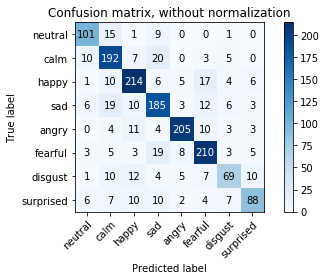

In [0]:
#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels


class_names = ['neutral','calm','happy', 'sad','angry','fearful','disgust','surprised']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

print("Test items: ", len(predicted_label))

# Plot confusion matrix
plot_confusion_matrix(real_label,predicted_label, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()